# 可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [3]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2023-06-26 09:37:17--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  21.7MB/s    用时 0.4s    

2023-06-26 09:37:18 (21.7 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



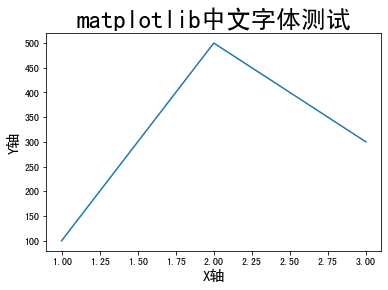

In [4]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [5]:
import os
os.chdir('../mmsegmentation')

In [6]:
os.getcwd()

'/home/featurize/work/MMSegmentation教程20230625/mmsegmentation'

## 导入工具包

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [8]:
# 日志文件路径
log_path = 'work_dirs/ZihaoDataset/20230626_091508/vis_data/scalars.json'

In [9]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [10]:
len(json_list)

145

In [11]:
eval(json_list[4])

{'lr': 0.009911076035273796,
 'data_time': 0.012584590911865234,
 'loss': 0.053705481439828874,
 'decode.loss_ce': 0.03722697552293539,
 'decode.acc_seg': 75.48828125,
 'aux.loss_ce': 0.016478505916893482,
 'aux.acc_seg': 76.1962890625,
 'time': 0.10383861064910889,
 'iter': 400,
 'memory': 2226,
 'step': 400}

In [12]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [13]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,0.009998,0.040695,0.133509,0.091614,32.592773,0.041895,18.536377,0.132196,12.0,5247.0,12.0
1,0.009978,0.005954,0.094269,0.067371,58.911133,0.026899,63.006592,0.097433,100.0,2226.0,100.0
2,0.009956,0.012975,0.072543,0.051076,92.059326,0.021466,93.035889,0.101229,200.0,2226.0,200.0
3,0.009933,0.014494,0.048579,0.033288,95.672607,0.015292,95.507812,0.103814,300.0,2226.0,300.0
4,0.009911,0.012585,0.053705,0.037227,75.488281,0.016479,76.196289,0.103839,400.0,2226.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...
116,0.007374,0.006323,0.029490,0.020679,94.464111,0.008811,94.586182,0.097493,11600.0,2226.0,11600.0
117,0.007351,0.019288,0.039659,0.027626,88.446045,0.012033,86.511230,0.110193,11700.0,2226.0,11700.0
118,0.007328,0.013976,0.041457,0.030010,97.961426,0.011447,98.132324,0.102474,11800.0,2226.0,11800.0
119,0.007305,0.013931,0.034024,0.023959,79.296875,0.010065,81.658936,0.103332,11900.0,2226.0,11900.0


In [14]:
df_test

,aAcc,mIoU,mAcc,data_time,time,step
0,82.34,35.83,45.42,0.027143,0.484517,500.0
1,83.06,36.76,41.86,0.009120,0.113243,1000.0
2,85.81,43.33,55.29,0.008603,0.113100,1500.0
3,85.07,45.15,53.92,0.009336,0.115375,2000.0
4,87.14,47.01,52.42,0.010632,0.116085,2500.0
5,88.72,50.67,55.22,0.010409,0.116183,3000.0
6,85.22,47.51,54.04,0.008903,0.114685,3500.0
7,91.09,60.10,67.85,0.008311,0.113736,4000.0
8,89.29,54.81,59.99,0.008508,0.112947,4500.0
9,86.76,43.50,48.69,0.007934,0.113595,5000.0


## 导出训练日志表格

In [15]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [16]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [17]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

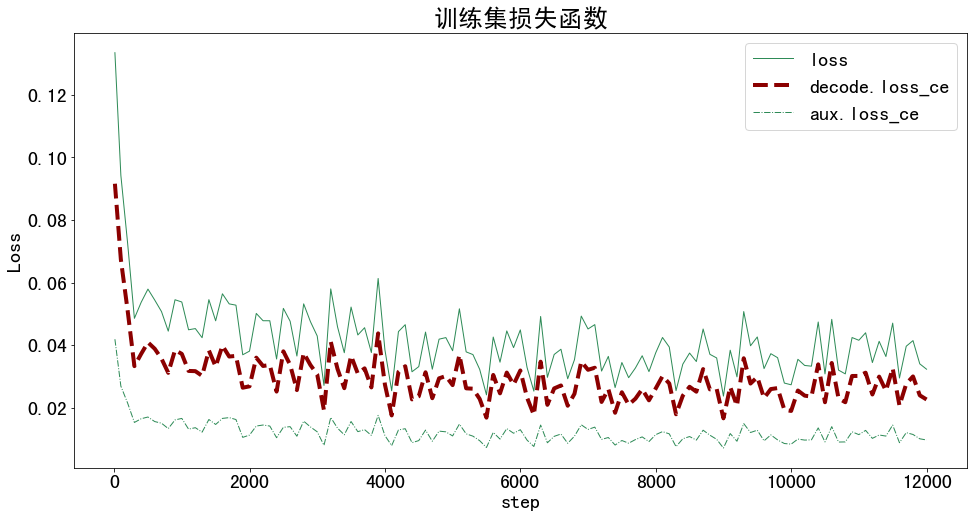

In [18]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [19]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'decode.loss_ce', 'decode.acc_seg',
       'aux.loss_ce', 'aux.acc_seg', 'time', 'iter', 'memory', 'step'],
      dtype='object')

In [20]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

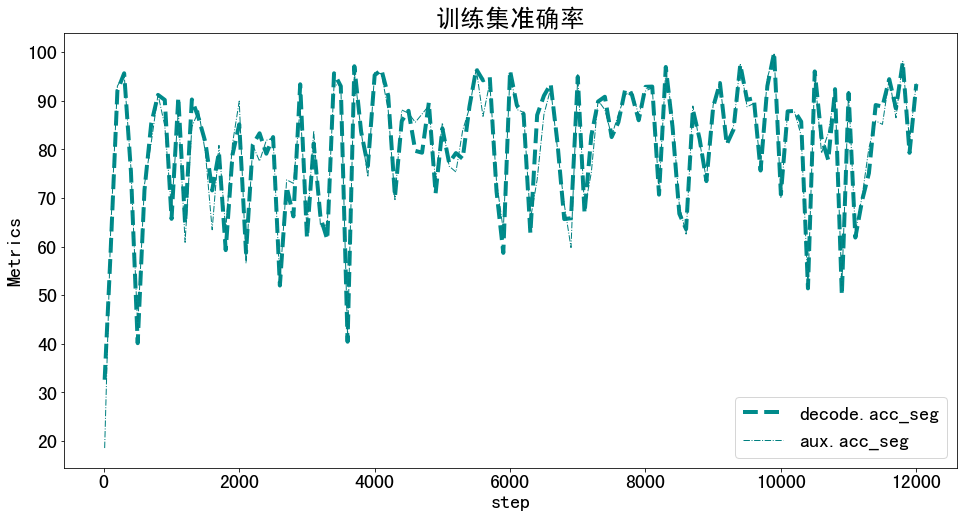

In [21]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标

In [22]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'data_time', 'time', 'step'], dtype='object')

In [23]:
metrics = ['aAcc', 'mIoU', 'mAcc']

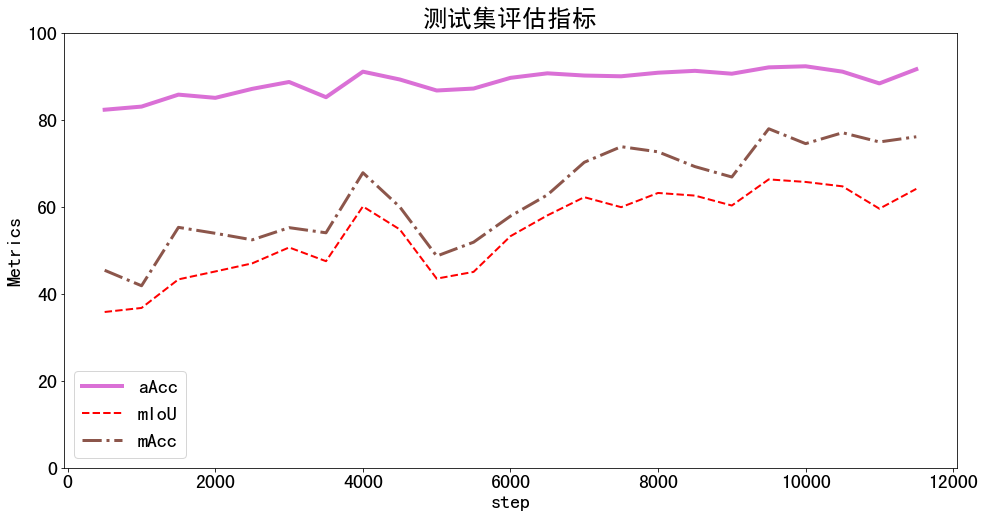

In [24]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()